In [1]:
# Common imports
import numpy as np
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scikitplot as skplt
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# To plot pretty figures

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# KMEANS Clustering

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

import pandas as pd

# Load your dataset using pandas
df = pd.read_csv('updated_datasetknn.csv')

# Separate the input features (X) and the target variable (y) from the dataset
X = df.drop('FBS', axis=1)
y = df['FBS']



In [3]:
X

,Age,Smoke,Dia_family_mem,Height,Weight,BMI,Pulse,Date of detection,systolic,diastolic
0,32.0,0.0,8.000000,170.0,69.0,23.88,76.0,2012.000000,120.0,80.0
1,60.0,1.0,0.000000,154.0,72.0,30.36,76.0,2013.666667,120.0,80.0
2,50.0,1.0,7.000000,165.0,57.0,20.94,76.0,2019.000000,120.0,80.0
3,48.0,1.0,6.000000,148.0,70.0,31.96,72.0,2015.000000,150.0,90.0
4,44.0,1.0,8.000000,163.0,65.0,24.46,76.0,2019.000000,120.0,80.0
...,...,...,...,...,...,...,...,...,...,...
664,35.0,1.0,8.000000,152.0,68.0,29.43,96.0,2013.000000,120.0,80.0
665,46.0,1.0,6.666667,169.0,72.0,25.21,76.0,2009.000000,120.0,80.0
666,62.0,1.0,6.000000,150.0,48.0,21.33,100.0,2005.000000,120.0,80.0
667,48.0,1.0,3.000000,160.0,61.0,23.83,110.0,2000.000000,120.0,80.0


In [4]:
y

0      15.7
1       7.3
2      17.1
3       8.5
4       7.9
       ... 
664    14.0
665    10.3
666    18.5
667    13.8
668    13.4
Name: FBS, Length: 669, dtype: float64

In [5]:
# def plot_clusters(X, y=None):
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
#     plt.xlabel("$x_1$", fontsize=14)
#     plt.ylabel("$x_2$", fontsize=14, rotation=0)
# def plot_clusters(X, y=None):
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
#     plt.xlabel("$x_1$", fontsize=14)
#     plt.ylabel("$x_2$", fontsize=14, rotation=0)

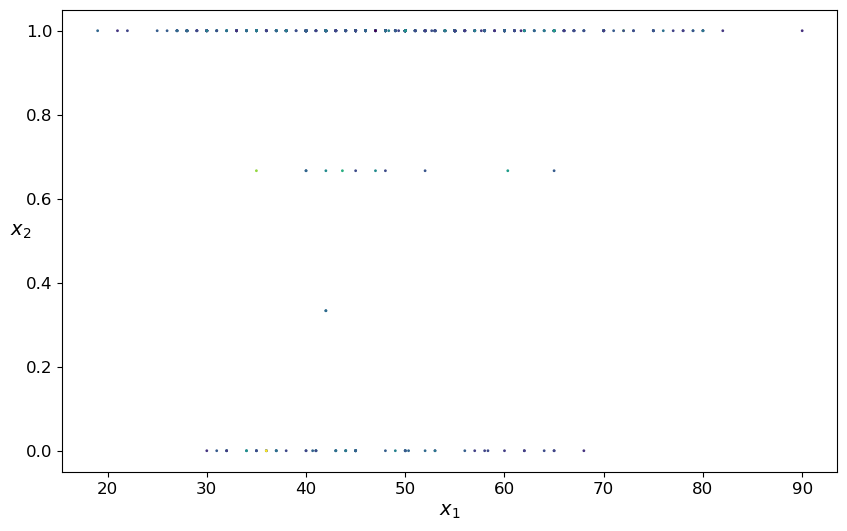

In [6]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(10, 6))  # Set a smaller figure size (e.g., 10 inches wide and 6 inches tall)
plot_clusters(X.to_numpy(), y)  # Convert X to a NumPy array
plt.savefig("blobs_plot.png")  # Save the plot to a file
plt.show()


# Clustering into 5 clusters

In [7]:
from sklearn.cluster import AgglomerativeClustering

k = 5
agg_clustering = AgglomerativeClustering(n_clusters=k)
y_pred = agg_clustering.fit_predict(X)


In [8]:
y_pred

array([1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 4,
       2, 4, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 4, 1, 1, 4, 4, 1, 1, 1,
       2, 1, 1, 2, 4, 1, 1, 0, 1, 1, 1, 4, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 4, 1, 4, 0, 1, 1, 2, 0, 4, 0, 1, 4,
       4, 1, 4, 2, 1, 4, 0, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 4, 1, 1, 1, 2, 2, 0, 1, 4, 2, 1, 4, 1, 4, 0, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 1, 0, 4, 1, 4, 1, 1, 1, 4, 2, 0, 1, 1, 2, 4, 1, 1, 0, 4,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 4, 0, 2, 2, 0, 0, 4, 1, 0, 4, 1, 0, 4,
       1, 1, 1, 2, 1, 1, 4, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 4, 4, 1, 1, 0,
       0, 4, 1, 2, 4, 2, 2, 2, 2, 2, 0, 1, 2, 4, 1, 1, 1, 2, 0, 1, 1, 4,
       0, 4, 2, 0, 2, 4, 1, 1, 1, 2, 1, 2, 4, 1, 2, 0, 2, 2, 1, 2, 4, 4,
       4, 1, 1, 0, 1, 4, 4, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 4, 1, 4, 1, 0,
       0, 2, 4, 1, 1, 0, 2, 4, 4, 0, 1, 1, 2, 1, 2, 4, 4, 0, 4, 1, 1, 4,
       1, 2, 1, 1, 2, 4, 0, 2, 2, 0, 1, 2, 2, 1, 1,

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering
n_clusters = 5  # Specify the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the data and obtain the cluster labels
labels = agg_clustering.fit_predict(X)

# Compute the cluster centers (average of the data points in each cluster)
cluster_centers = []
for cluster_label in range(n_clusters):
    cluster_points = X[labels == cluster_label]
    cluster_center = cluster_points.mean(axis=0)
    cluster_centers.append(cluster_center)

# Print the cluster centers
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} center: {center}")


Cluster 1 center: Age                    38.744526
Smoke                   0.963504
Dia_family_mem          5.277372
Height                149.073479
Weight                 58.154501
BMI                    26.975766
Pulse                  84.190268
Date of detection    2009.593674
systolic              119.367397
diastolic              78.637470
dtype: float64
Cluster 2 center: Age                    45.158088
Smoke                   0.849265
Dia_family_mem          5.720588
Height                163.566789
Weight                 71.754289
BMI                    26.910343
Pulse                  77.067157
Date of detection    2009.562500
systolic              121.213235
diastolic              80.300245
dtype: float64
Cluster 3 center: Age                    52.828125
Smoke                   0.942708
Dia_family_mem          5.367188
Height                157.010677
Weight                 61.324219
BMI                    25.033620
Pulse                  78.542188
Date of detection    2008

# Decision Boundaries using Voronoi diagram

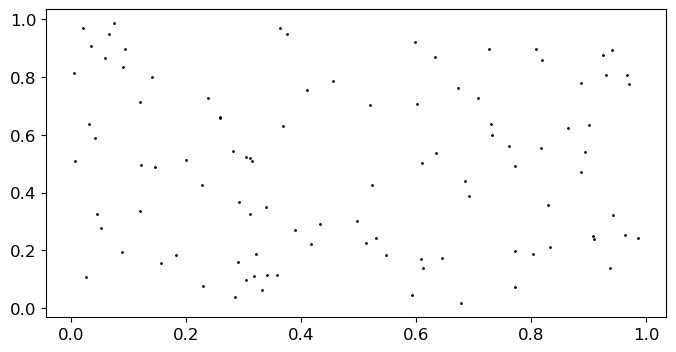

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Generate random data
np.random.seed(42)
X = np.random.rand(100, 2)

# Plot the data points
plt.figure(figsize=(8, 4))
plot_data(X)

# Save the figure
plt.savefig("voronoi_plot.png")

# Show the plot
plt.show()


In [11]:
# import matplotlib.pyplot as plt

# # Create a figure with a specific size
# plt.figure(figsize=(8, 4))
# def plot_data(X):
#     plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


# # Plot the data points
# plot_data(X)

# # Save the figure
# plt.savefig("voronoi_plot.png")

# # Display the figure
# plt.show()


# The KMEANS Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

 - First initialize  centroids randomly:  distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
 - Repeat until convergence (i.e., until the centroids stop moving):
  - Assign each instance to the closest centroid.
  - Update the centroids to be the mean of the instances that are assigned to them.

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [12]:
import numpy as np

def initialize_centroids(X, n_clusters, random_state=0):
    np.random.seed(random_state)
    indices = np.random.choice(X.shape[0], n_clusters, replace=False)
    return X[indices]

def assign_labels(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, n_clusters):
    centroids = np.empty((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def kmeans_iteration(X, n_clusters, max_iter, random_state=0):
    centroids = initialize_centroids(X, n_clusters, random_state)
    for _ in range(max_iter):
        labels = assign_labels(X, centroids)
        centroids = update_centroids(X, labels, n_clusters)
    return labels, centroids

# Generate random data
np.random.seed(42)
X = np.random.rand(100, 2)

# Perform iterations with different max_iter values
labels_iter1, centroids_iter1 = kmeans_iteration(X, n_clusters=5, max_iter=1, random_state=0)
labels_iter2, centroids_iter2 = kmeans_iteration(X, n_clusters=5, max_iter=2, random_state=0)
labels_iter3, centroids_iter3 = kmeans_iteration(X, n_clusters=5, max_iter=3, random_state=0)

print("Iteration 1:")
print("Labels:", labels_iter1)
print("Centroids:\n", centroids_iter1)
print()
print("Iteration 2:")
print("Labels:", labels_iter2)
print("Centroids:\n", centroids_iter2)
print()
print("Iteration 3:")
print("Labels:", labels_iter3)
print("Centroids:\n", centroids_iter3)



Iteration 1:
Labels: [0 0 2 2 0 2 4 2 1 1 1 3 0 2 1 1 2 0 3 1 2 2 3 1 1 0 0 0 2 2 1 4 3 2 2 4 2
 0 4 3 0 3 3 0 4 2 4 4 1 2 2 1 4 1 3 3 0 0 4 4 0 3 3 0 2 1 2 4 0 0 4 1 3 1
 2 4 2 4 0 3 1 1 2 3 2 1 1 1 1 4 3 0 3 4 1 2 0 3 0 0]
Centroids:
 [[0.73259852 0.79513482]
 [0.51398901 0.34183292]
 [0.08331226 0.58984263]
 [0.2930943  0.29550076]
 [0.86129271 0.31835432]]

Iteration 2:
Labels: [0 0 3 2 0 2 4 3 3 1 1 3 0 2 1 1 2 0 3 1 2 2 2 3 1 0 0 0 3 3 3 4 2 2 2 4 2
 0 4 3 0 3 3 0 4 2 0 4 1 3 2 3 4 0 3 3 0 0 4 4 0 3 3 0 2 3 3 4 0 0 4 1 3 1
 3 4 2 4 0 2 2 1 2 3 2 4 1 1 1 4 3 0 2 4 1 2 0 3 0 0]
Centroids:
 [[0.72034731 0.78374143]
 [0.57968787 0.29064481]
 [0.12623486 0.72415427]
 [0.25408135 0.24247246]
 [0.85609141 0.28431124]]

Iteration 3:
Labels: [2 0 3 2 0 2 4 3 2 1 1 3 0 2 1 1 2 0 3 1 2 2 2 2 1 0 0 0 3 3 3 4 2 2 2 4 2
 0 4 3 0 3 3 0 4 2 0 4 1 3 2 3 4 2 3 3 0 0 4 4 0 3 3 0 2 3 3 4 0 2 4 1 3 1
 3 4 2 4 0 2 2 1 2 3 2 1 1 1 1 4 3 0 2 0 1 2 0 3 0 0]
Centroids:
 [[0.77077295 0.75849762]
 [0.586212

In [13]:
def plot_decision_boundaries(labels, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = assign_labels_to_grid(xx, yy, labels)

    plt.contourf(xx, yy, Z, cmap="Pastel2", alpha=0.8)
    plt.contour(xx, yy, Z, linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(compute_centroids(X, labels))

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


# KMEANS Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [14]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)


Saving figure kmeans_variability_plot


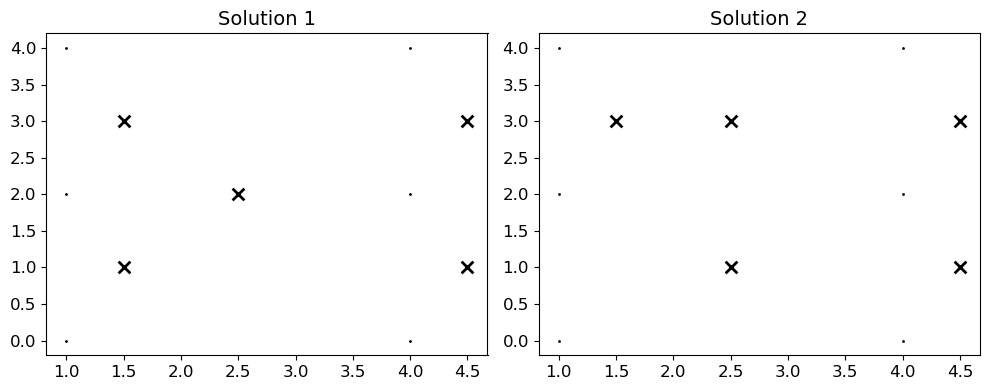

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusterer_comparison(clusterer1, clusterer2, X, label1, label2):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plot_data(X)
    plot_centroids(clusterer1, circle_color='r', cross_color='w')
    plt.title(label1, fontsize=14)

    plt.subplot(122)
    plot_data(X)
    plot_centroids(clusterer2, circle_color='b', cross_color='w')
    plt.title(label2, fontsize=14)

    plt.tight_layout()

    def save_fig(name):
        plt.savefig(name + ".png")

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

clusterer1 = np.array([[1.5, 1], [4.5, 1], [1.5, 3], [4.5, 3], [2.5, 2]])
clusterer2 = np.array([[2.5, 1], [1.5, 3], [4.5, 1], [2.5, 3], [4.5, 3]])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_data(X)
plot_centroids(clusterer1)
plt.title("Solution 1", fontsize=14)

plt.subplot(122)
plot_data(X)
plot_centroids(clusterer2)
plt.title("Solution 2", fontsize=14)

save_fig("kmeans_variability_plot")
plt.show()



# Inertia

In [16]:
def calculate_inertia(cluster_centers, X):
    # Calculate the squared Euclidean distances between each sample and its closest centroid
    distances = np.sum((X - cluster_centers[:, np.newaxis])**2, axis=2)
    
    # Calculate the inertia as the sum of squared distances
    inertia = np.sum(np.min(distances, axis=0))
    
    return inertia

def calculate_score(cluster_centers, X):
    # Calculate the negative squared Euclidean distances between each sample and its closest centroid
    distances = np.sum((X - cluster_centers[:, np.newaxis])**2, axis=2)
    
    # Calculate the score as the sum of negative squared distances
    score = -np.sum(np.min(distances, axis=0))
    
    return score

cluster_centers = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
inertia = calculate_inertia(cluster_centers, X)
score = calculate_score(cluster_centers, X)

print(inertia)
print(score)


27
-27


# N_init Hyperparameter

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

# KMeans++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in <a href = "http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf">a 2006 paper </a> by David Arthur and Sergei Vassilvitskii:

 - Take one centroid $c_1$, chosen uniformly at random from the dataset.
 - Take a new center $c_2$ , choosing an instance 
 with probability: 
 $D(x_i)^2 / \sum_{j = 1}^{m} D(x_j)^2$
 where $D(x_i)$
 is the distance between the instance $x_i$
 and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
Repeat the previous step until all  centroids have been chosen.
The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

# Accelerated KMEANS

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this <a href = "https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf">2003 paper</a> by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

In [17]:
# import timeit

# def your_code():
#     # Write your code here

# execution_time = timeit.timeit(your_code, number=50)
# print("Execution time:", execution_time)


In [18]:
# %timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

# Finding the Optimal number of Clusters

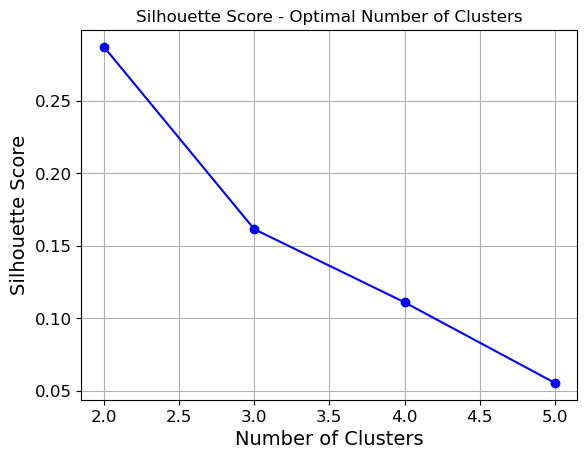

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
cluster_range = range(2, min(30, len(X)))

for k in cluster_range:
    # Perform clustering with k clusters using AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(X)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(X, clustering.labels_)
    silhouette_scores.append(silhouette)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Optimal Number of Clusters')
plt.grid(True)

# Save the figure
plt.savefig('optimal_clusters_silhouette.png')
plt.show()


# Silhouette Clustering

In [20]:
# from IPython.display import Image
# Image(filename='purpose-of-silhouette.png') 

In [21]:
# Image(filename='Silhouette-clustering.png') 

In [22]:
# from sklearn.metrics import silhouette_score

In [23]:
# kmeans = KMeans(n_clusters = 3, random_state = 1)
# cluster_labels = kmeans.fit_predict(X)
# skplt.metrics.plot_silhouette(X, cluster_labels);
# silhouette_score(X, kmeans.labels_)
# save_fig('Cluster-size 3')

In [24]:
# kmeans = KMeans(n_clusters = 4, random_state = 1)
# cluster_labels = kmeans.fit_predict(X)
# skplt.metrics.plot_silhouette(X, cluster_labels);
# silhouette_score(X, kmeans.labels_)
# save_fig('Cluster-size 4')

In [25]:
# kmeans = KMeans(n_clusters = 5, random_state = 1)
# cluster_labels = kmeans.fit_predict(X)
# skplt.metrics.plot_silhouette(X, cluster_labels);
# silhouette_score(X, kmeans.labels_)
# save_fig('Cluster-size 5')

In [26]:
# kmeans = KMeans(n_clusters = 8, random_state = 1)
# cluster_labels = kmeans.fit_predict(X)
# skplt.metrics.plot_silhouette(X, cluster_labels);
# silhouette_score(X, kmeans.labels_)
# save_fig('Cluster-size 8')

In [27]:
# clusterSize = [3, 4, 5, 6, 7, 8]
# silh = []

In [28]:
# for x in clusterSize:
#     kmeans = KMeans(n_clusters = x, random_state = 1)
#     cluster_labels = kmeans.fit_predict(X)
#     silh.append(silhouette_score(X, kmeans.labels_))
# plt.figure(figsize = (8, 6))
# plt.ylabel("Silhouette Score")
# plt.xlabel("Cluster Size")
# plt.plot(clusterSize, silh);
# plt.title("Variation of Average Silhouette Score with Cluster Size")
# silh.clear()
# save_fig("Average Silhouette Score")